In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.cluster import KMeans
import time

In [46]:
data_dir = '/home/squid/Desktop/Octopi_data'

pos_images = np.load(os.path.join(data_dir, 'combined_images_parasite.npy'))
pos_images.shape

(76126, 4, 31, 31)

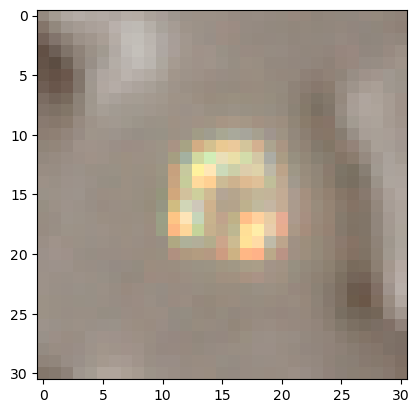

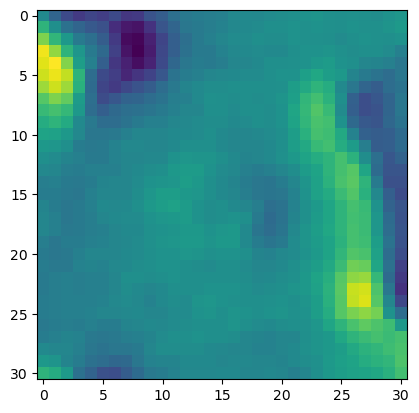

In [44]:
# image (4,31,31), rgb + brightfield
# im = pos_images[0][:3,:,:].transpose(1,2,0) # expects (W,H,C)
im = pos_images[0].transpose(1,2,0)
plt.imshow(im)
plt.show()
plt.imshow(pos_images[0][3,:,:])
plt.show()

Applying UMAP


/home/squid/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/squid/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


FileNotFoundError: [Errno 2] No such file or directory: 'tests/visualization/umap_clusters_1715748211.720635.png'

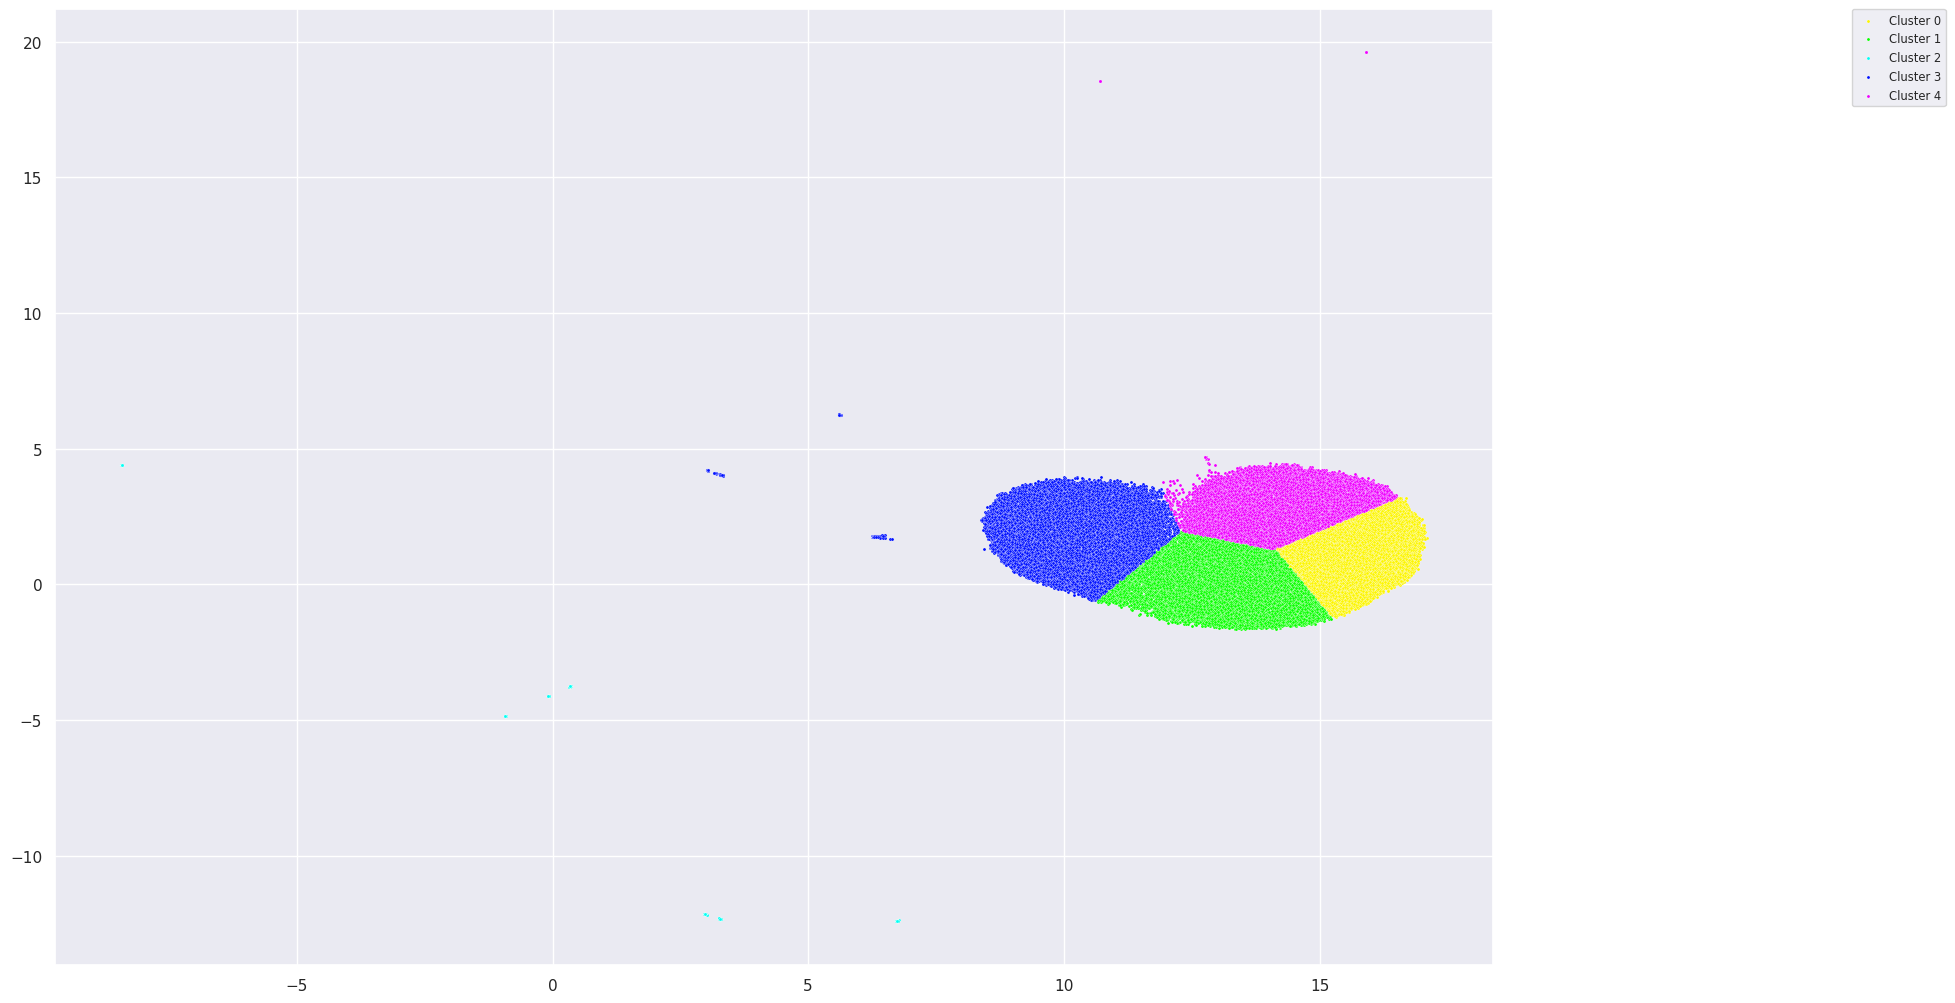

In [48]:
# cluster to find stages/morphologies
n_samples = pos_images.shape[0]
data = pos_images.reshape(n_samples, -1)

print('Applying UMAP')
reducer = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, metric='euclidean', learning_rate=1.0, n_epochs=500, spread=1.0, random_state=42)
embedding = reducer.fit_transform(data)

n_clusters = 5  # Adjust this based on domain knowledge or experimentation
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embedding)

# visualize
sns.set(font_scale=1)
plt.figure(figsize=(20, 12))
palette = sns.color_palette("hsv", n_clusters)
cluster_labels = ['Cluster {}'.format(i) for i in range(n_clusters)]
for i in range(n_clusters):
    sns.scatterplot(x=embedding[clusters == i, 0], y=embedding[clusters == i, 1], color=palette[i], label=cluster_labels[i], s=5)

plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0., fontsize='x-small')
plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig(f"umap_clusters_{time.time()}.png", dpi=300)
plt.show()



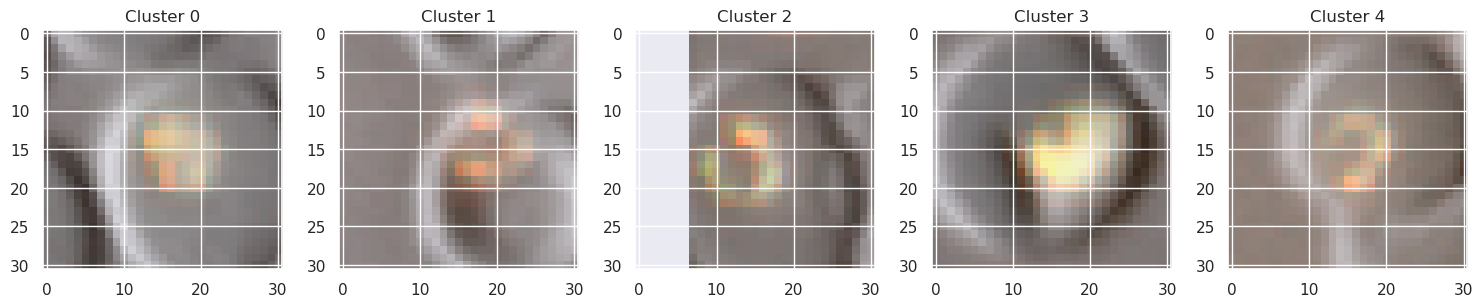

In [52]:
# plot sample from each cluster
sample_indices = []
for i in range(n_clusters):
    cluster_indices = np.where(clusters == i)[0]
    sample_indices.append(np.random.choice(cluster_indices))

fig, axes = plt.subplots(1, n_clusters, figsize=(15, 3))
for ax, idx in zip(axes, sample_indices):
    ax.imshow(pos_images[idx].transpose(1, 2, 0))
    # ax.axis('off')
    ax.set_title(f'Cluster {clusters[idx]}')

plt.tight_layout()
plt.show()